In [1]:
# перед началом работы не забудьте скачать файл train.json.zip с Kaggle и разархивировать его
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# сразу загрузим датасет от Renthop
with open('Datasets/train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

In [2]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


# Text Processing

In [4]:
#bag of words

from functools import reduce 
import numpy as np

texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'have', 'a', 'dog'], 
        ['he', 'and', 'i', 'have', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(list(reduce(lambda x, y: x + y, texts)))))

def vectorize(text): 
    vector = np.zeros(len(dictionary)) 
    for i, word in dictionary: 
        num = 0 
        for w in text: 
            if w == word: 
                num += 1 
        if num: 
            vector[i] = num 
    return vector

for t in texts: 
    print(vectorize(t))

[1. 1. 1. 1. 0. 0. 0.]
[1. 0. 0. 1. 0. 1. 1.]
[2. 1. 1. 1. 2. 1. 1.]


In [5]:
#ngram_range = (min_ngram_words,max_ngram_words)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [6]:
vect = CountVectorizer(ngram_range=(1,2))
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [7]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

In [8]:
from scipy.spatial.distance import euclidean
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(3,3), analyzer='char_wb')

n1, n2, n3, n4 = vect.fit_transform(['andersen', 'petersen', 'petrov', 'smith']).toarray()

euclidean(n1, n2), euclidean(n2, n3), euclidean(n3, n4)

(2.8284271247461903, 3.1622776601683795, 3.3166247903554)

# Image Processing

In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from scipy.misc import face
import numpy as np

resnet_settings = {'include_top': False, 'weights': 'imagenet'}
resnet = ResNet50(**resnet_settings)

img = image.array_to_img(face())
# какой милый енот! 
img = img.resize((224, 224))
# в реальной жизни может понадобиться внимательнее относиться к ресайзу
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# нужно дополнительное измерение, т.к. модель рассчитана на работу с массивом изображений

features = resnet.predict(x)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

##### Just a random picture from search
img = 'download.png'


img = Image.open(img)
text = pytesseract.image_to_string(img)
text

FileNotFoundError: [Errno 2] No such file or directory: 'download.png'

In [ ]:
#img = requests.get('https://photos.renthop.com/2/8393298_6acaf11f030217d05f3a5604b9a2f70f.jpg')
img = Image.open('dn.jpeg')
pytesseract.image_to_string(img)

# Geospatial Data Processing

In [11]:
import reverse_geocoder as revgc

revgc.search((df.latitude[0], df.longitude[0]))


Loading formatted geocoded file...


[OrderedDict([('lat', '40.74482'),
              ('lon', '-73.94875'),
              ('name', 'Long Island City'),
              ('admin1', 'New York'),
              ('admin2', 'Queens County'),
              ('cc', 'US')])]

# Datetime

In [12]:
from datetime import datetime

df['created'] = df['created'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

df['dow'] = df['created'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [13]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dow,is_weekend
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,4,0
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low,6,1
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high,6,1
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low,0,0
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low,3,0


In [14]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period 
    return np.cos(value), np.sin(value)

In [15]:
from scipy.spatial import distance
euclidean(make_harmonic_features(23), make_harmonic_features(1)) 

0.5176380902050424

# TimeSeries and stuff

In [16]:
# Install pyyaml ua-parser user-agents
import user_agents

ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36'
ua = user_agents.parse(ua)

print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)


Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


# Feature Transformation

In [17]:
from sklearn.preprocessing import StandardScaler  
from scipy.stats import beta
from scipy.stats import shapiro

data = beta(1, 10).rvs(1000).reshape(-1, 1)

shapiro(data)

(0.8603804111480713, 7.06540941793379e-29)

In [18]:
shapiro(StandardScaler().fit_transform(data))

(0.8603804111480713, 7.06540941793379e-29)

In [19]:
data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)
StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [20]:
((data - data.mean()) / data.std()) == StandardScaler().fit_transform(data)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [21]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [22]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(1000)
shapiro(data)

(0.5098952054977417, 0.0)

In [23]:
data.std()

2.390694854990245

In [24]:

shapiro(np.log(data))

(0.9976818561553955, 0.17346009612083435)

In [25]:
# Let's draw plots!
import statsmodels.api as sm

# Let's take the price feature from Renthop dataset and filter by hands the most extreme values for clarity

price = df.price[(df.price <= 20000) & (df.price > 500)]
price_log = np.log(price)

# A lot of gestures so that sklearn didn't shower us with warnings
price_mm = MinMaxScaler().fit_transform(price.values.reshape(-1, 1).astype(np.float64)).flatten()
price_z = StandardScaler().fit_transform(price.values.reshape(-1, 1).astype(np.float64)).flatten()

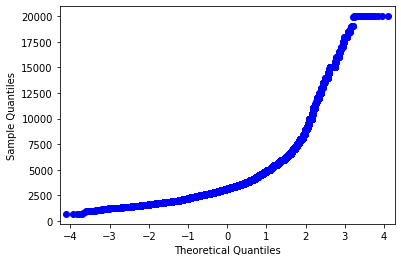

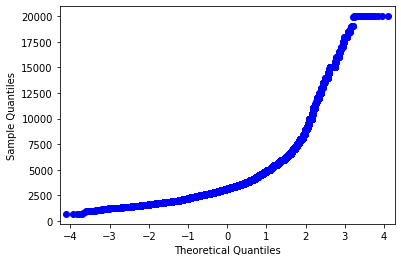

In [26]:
sm.qqplot(price, loc=price.mean(), scale=price.std())

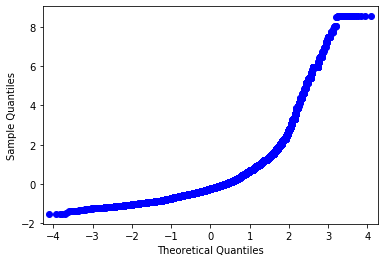

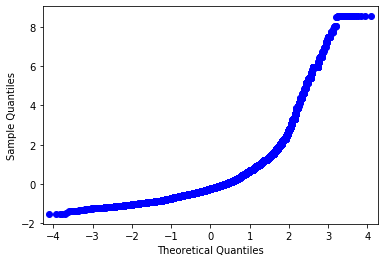

In [27]:
sm.qqplot(price_z, loc=price_z.mean(), scale=price_z.std())

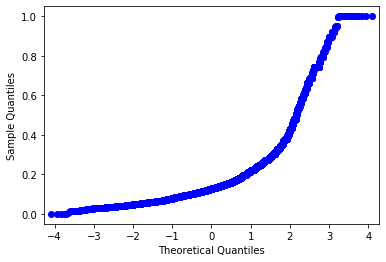

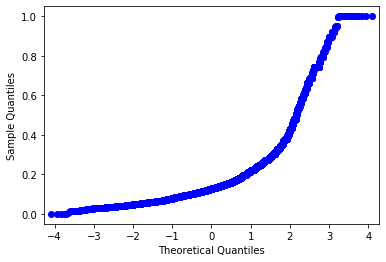

In [28]:
sm.qqplot(price_mm, loc=price_mm.mean(), scale=price_mm.std())

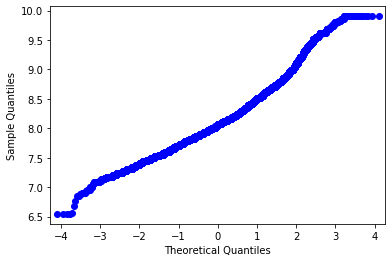

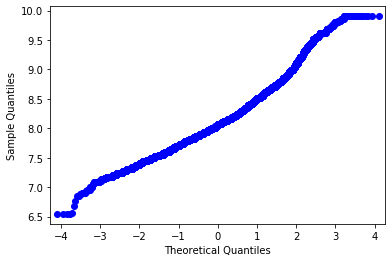

In [29]:
sm.qqplot(price_log, loc=price_log.mean(), scale=price_log.std())

# Interactions

In [30]:
rooms = df["bedrooms"].apply(lambda x: max(x, .5))
# избегаем деления на ноль; .5 выбран более или менее произвольно
df["price_per_bedroom"] = df["price"] / rooms

# Filling in the missing values

# Feature selection

# Statistical approaches

In [31]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification()

x_data_generated.shape

(100, 20)

In [32]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

(100, 19)

In [33]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 18)

In [34]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 13)

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='neg_log_loss').mean()

-0.7036223304857082

In [36]:
cross_val_score(LogisticRegression(), x_data_kbest, y_data_generated, scoring='neg_log_loss').mean()

-0.3889248707216164

In [37]:
cross_val_score(LogisticRegression(), x_data_varth, y_data_generated, scoring='neg_log_loss').mean()

-0.4659887600095698

# Selection by modeling

In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()),
                     LogisticRegression())

lr = LogisticRegression()
rf = RandomForestClassifier()

print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())

-0.280251139757224
-0.6390894008748896
-0.23921973400318133


In [39]:
x_data = x_data_generated
y_data = y_data_generated

pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator=RandomForestClassifier()), LogisticRegression())

pipe2 = make_pipeline(StandardScaler(), LogisticRegression())

rf = RandomForestClassifier()

print('LR + selection: ', cross_val_score(pipe1, x_data, y_data, scoring='neg_log_loss').mean())
print('LR: ', cross_val_score(pipe2, x_data, y_data, scoring='neg_log_loss').mean())
print('RF: ', cross_val_score(rf, x_data, y_data, scoring='neg_log_loss').mean())

LR + selection:  -0.25303887027572297
LR:  -0.2744733957741276
RF:  -0.6184885649222277


# Grid Search

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(LogisticRegression(), scoring='neg_log_loss', 
                                     verbose=2, k_features=3, forward=False, n_jobs=-1)

selector.fit(x_data, y_data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.1s finished

[2019-08-21 15:07:34] Features: 19/3 -- score: -0.2725595570999879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2019-08-21 15:07:34] Features: 18/3 -- score: -0.24518624345523757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2019-08-21 15:07:35] Features: 17/3 -- score: -0.22686767599332006[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2019-08-21 15:07:35] Features: 16/3 -- score: -0.21115603509861214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s fin

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='warn',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='warn',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),


In [45]:
selector.get_params()

{'clone_estimator': True,
 'cv': 5,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'warn',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'floating': False,
 'forward': False,
 'k_features': 3,
 'n_jobs': -1,
 'pre_dispatch': '2*n_jobs',
 'scoring': 'neg_log_loss',
 'verbose': 2,
 'logisticregression'